# Access To Toronto Crime portal databases

In [62]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt

# File data directory

In [63]:
# Set the path to your shapefile
shapefile_path = r'F:\AcPro Basics\Toronto White Cups\Analsysis\Crimes.shp'


# Exploratory spatial data analysis
# Inspect the columns of the data
# Used data points of 2018
# Reports/Hour

   OBJECTID   EVENT_UNIQ  REPORT_DAT    OCC_DATE  REPORT_YEA REPORT_MON  \
0    134019  GO-20182309  2018-01-01  2017-12-31        2018    January   
1    134020  GO-20182351  2018-01-01  2017-12-31        2018    January   
2    134021  GO-20182173  2018-01-01  2018-01-01        2018    January   
3    134022  GO-20181830  2018-01-01  2018-01-01        2018    January   
4    134023  GO-20183190  2018-01-01  2017-12-29        2018    January   

   REPORT_DAY  REPORT_DOY REPORT_DOW  REPORT_HOU  ...  UCR_EXT  \
0           1           1     Monday           9  ...      210   
1           1           1     Monday          11  ...      200   
2           1           1     Monday           8  ...      200   
3           1           1     Monday           5  ...      110   
4           1           1     Monday          13  ...      200   

                  OFFENCE       MCI_CATEGO  HOOD_158             NEIGHBOURH  \
0  Theft Of Motor Vehicle       Auto Theft        70        South Riverda

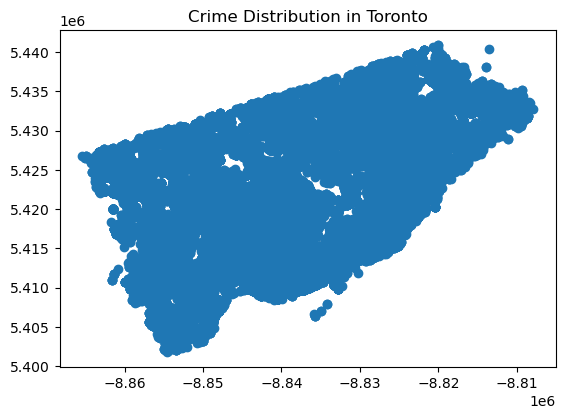

In [64]:
# Read the shapefile into a GeoDataFrame
crime_data = gpd.read_file(shapefile_path)

# Display the first few rows of the GeoDataFrame to check the data
print(crime_data.head())

# Plot the crime data
crime_data.plot()
plt.title('Crime Distribution in Toronto')
plt.show()


# ESDA Continued

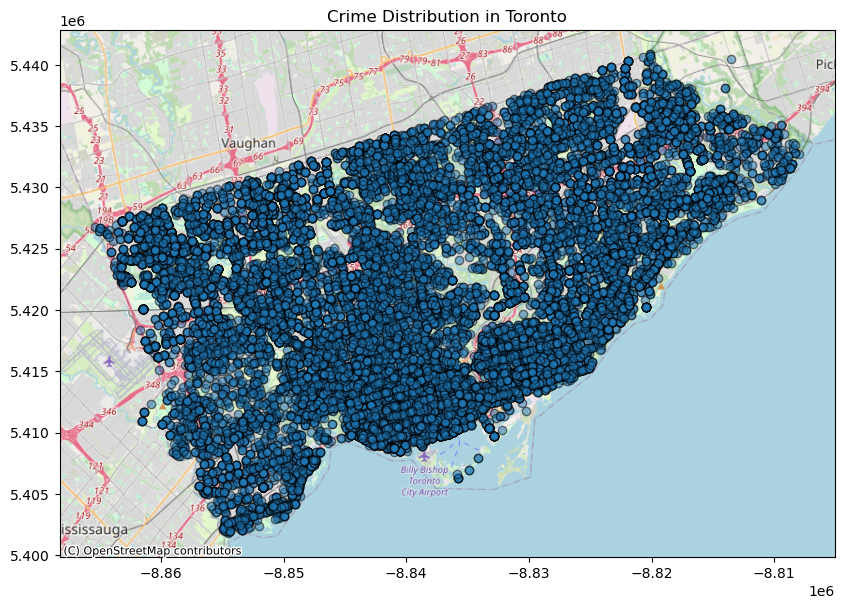

In [4]:
# Import necessary libraries
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Set the path to your shapefile
shapefile_path = r'F:\AcPro Basics\Toronto White Cups\Analsysis\Crimes.shp'

# Read the shapefile into a GeoDataFrame
crime_data = gpd.read_file(shapefile_path)

# Plot the crime data
ax = crime_data.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')

# Add basemap using OpenStreetMap as the source
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

plt.title('Crime Distribution in Toronto')
plt.show()


# Part A
# Check for clusters

Mean REPORT_HOU: 12.934335744194899
Median REPORT_HOU: 14.0
Mode REPORT_HOU: 15


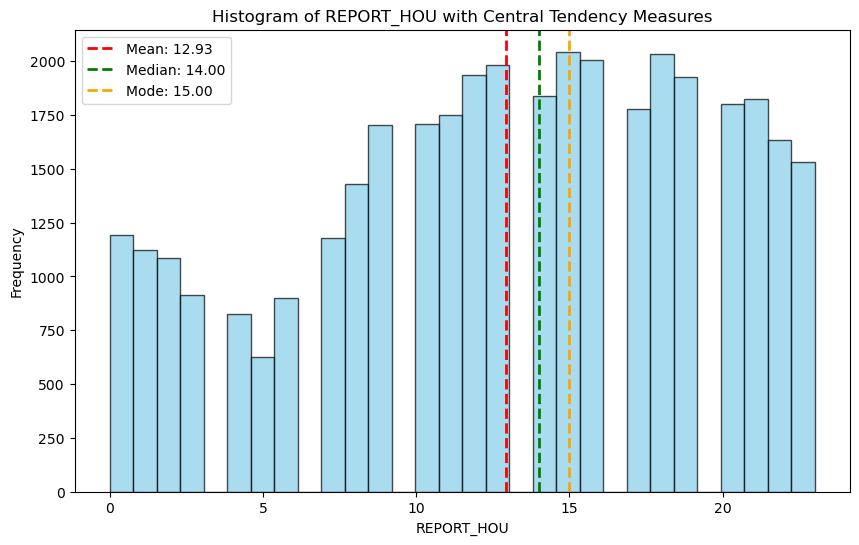

In [66]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = r'F:\AcPro Basics\Toronto White Cups\Analsysis\Crimes.shp'
gdf = gpd.read_file(shapefile_path)

# Extract the 'REPORT_HOU' column
report_hours = gdf['REPORT_HOU']

# Calculate central tendency statistics
mean_report_hours = report_hours.mean()
median_report_hours = report_hours.median()
mode_report_hours = report_hours.mode().values[0]

# Print the results
print(f"Mean REPORT_HOU: {mean_report_hours}")
print(f"Median REPORT_HOU: {median_report_hours}")
print(f"Mode REPORT_HOU: {mode_report_hours}")

# Create a histogram for visualization
fig, ax = plt.subplots(figsize=(10, 6))
ax.hist(report_hours, bins=30, color='skyblue', edgecolor='black', alpha=0.7)
ax.axvline(mean_report_hours, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_report_hours:.2f}')
ax.axvline(median_report_hours, color='green', linestyle='dashed', linewidth=2, label=f'Median: {median_report_hours:.2f}')
ax.axvline(mode_report_hours, color='orange', linestyle='dashed', linewidth=2, label=f'Mode: {mode_report_hours:.2f}')

# Set labels and title
ax.set_xlabel('REPORT_HOU')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of REPORT_HOU with Central Tendency Measures')

# Add legend
ax.legend()

# Show the plot
plt.show()


# Density Estimation

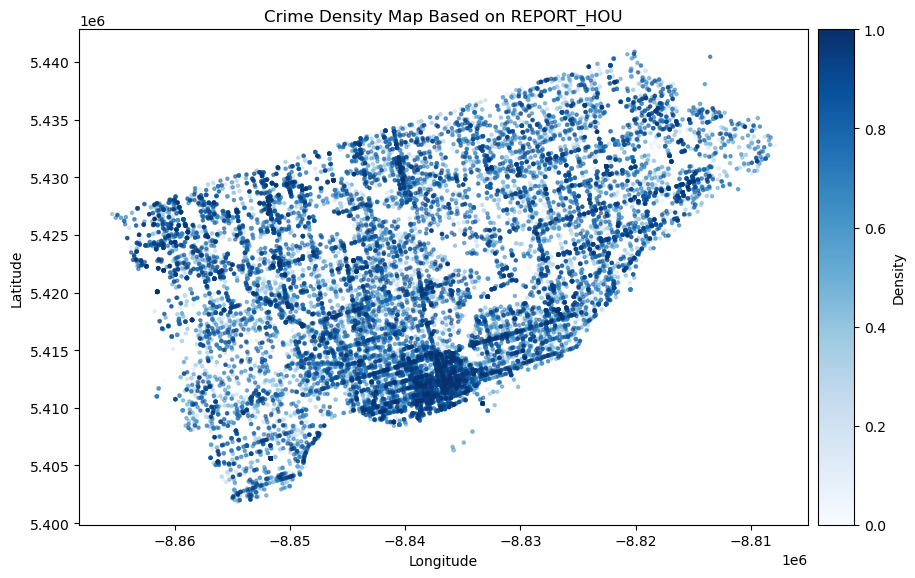

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.neighbors import KernelDensity

# Load the shapefile
shapefile_path = r'F:\AcPro Basics\Toronto White Cups\Analsysis\Crimes.shp'
gdf = gpd.read_file(shapefile_path)

# Extract the 'REPORT_HOU' column
report_hours = gdf['REPORT_HOU']

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Create a density map using hexbin
gdf.plot(ax=ax, alpha=0.5, markersize=5, cmap='Blues', legend=True)

# Add colorbar for the density map
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)

# Create a dummy scatter plot for the colorbar
scatter = ax.scatter([], [], c=[], cmap='Blues', label='Density')
fig.colorbar(scatter, cax=cax, label='Density')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Crime Density Map Based on REPORT_HOU')

# Show the plot
plt.show()


# Part A
# Density Estimation
# Quadrat Method

Density values for each quadrat:
Quadrat (0, 0), Density: 0.0
Quadrat (0, 1), Density: 0.0
Quadrat (0, 2), Density: 8.464630009953425e-07
Quadrat (0, 3), Density: 2.673041055774766e-06
Quadrat (0, 4), Density: 4.232315004976712e-06
Quadrat (0, 5), Density: 2.258719692129677e-05
Quadrat (0, 6), Density: 1.50135805966016e-05
Quadrat (0, 7), Density: 0.0
Quadrat (0, 8), Density: 0.0
Quadrat (0, 9), Density: 0.0
Quadrat (1, 0), Density: 7.083558797803129e-06
Quadrat (1, 1), Density: 1.0380309433258673e-05
Quadrat (1, 2), Density: 1.3187002541822177e-05
Quadrat (1, 3), Density: 1.1583177908357318e-05
Quadrat (1, 4), Density: 2.067151749799152e-05
Quadrat (1, 5), Density: 2.517113660854571e-05
Quadrat (1, 6), Density: 3.1007276246987284e-05
Quadrat (1, 7), Density: 1.4256218964132083e-06
Quadrat (1, 8), Density: 0.0
Quadrat (1, 9), Density: 0.0
Quadrat (2, 0), Density: 2.9180698192207857e-05
Quadrat (2, 1), Density: 1.5770942229071116e-05
Quadrat (2, 2), Density: 1.8310331232057146e-05
Quadr

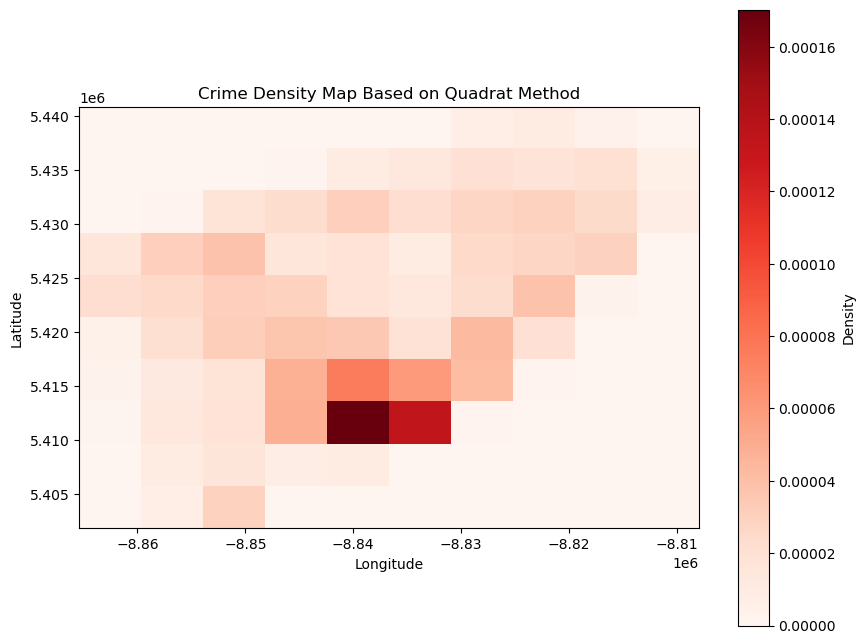

In [6]:
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

# Load the shapefile
shapefile_path = r'F:\AcPro Basics\Toronto White Cups\Analsysis\Crimes.shp'
gdf = gpd.read_file(shapefile_path)

# Extract the 'REPORT_HOU' column
report_hours = gdf['REPORT_HOU']

# Set up the figure
fig, ax = plt.subplots(figsize=(10, 8))

# Define the number of quadrats in each dimension
num_quadrats_x = 10
num_quadrats_y = 10

# Create 2D histogram for quadrat method
hist, x_edges, y_edges = np.histogram2d(gdf.geometry.x, gdf.geometry.y, bins=[num_quadrats_x, num_quadrats_y])

# Calculate quadrat area
quadrat_area = (x_edges[1] - x_edges[0]) * (y_edges[1] - y_edges[0])

# Calculate densities
densities = hist / quadrat_area

# Print the density values
print("Density values for each quadrat:")
for i in range(num_quadrats_x):
    for j in range(num_quadrats_y):
        print(f"Quadrat ({i}, {j}), Density: {densities[i, j]}")

# Create a density map using quadrat method
cax = ax.imshow(densities.T, origin='lower', extent=[x_edges[0], x_edges[-1], y_edges[0], y_edges[-1]], cmap='Reds')

# Add colorbar for the density map
cbar = plt.colorbar(cax, label='Density')

# Set labels and title
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_title('Crime Density Map Based on Quadrat Method')

# Show the plot
plt.show()


# Towards Outlier Detection within the dataset

Summary Statistics for REPORT_HOU:
count    36778.000000
mean        12.691256
std          4.852299
min          0.000000
25%          9.500000
50%         13.000000
75%         16.000000
max         23.000000
Name: REPORT_HOU, dtype: float64


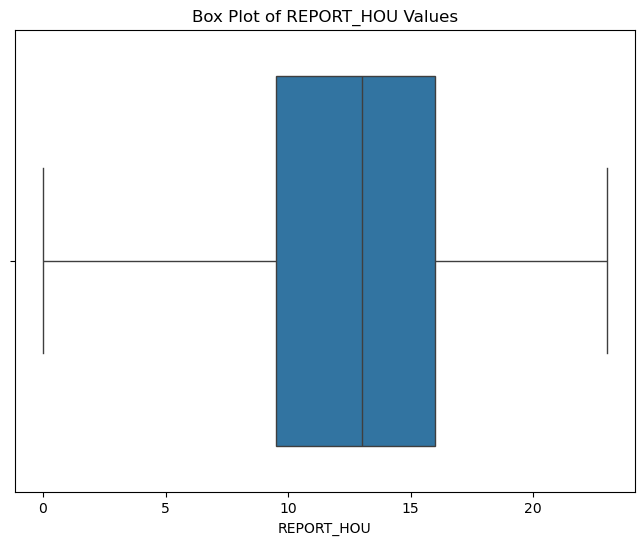

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'gdf' is your GeoDataFrame with the 'REPORT_HOU' column
report_hou_values = gdf['REPORT_HOU']

# Calculate summary statistics
summary_stats = report_hou_values.describe()

# Print summary statistics
print("Summary Statistics for REPORT_HOU:")
print(summary_stats)

# Create a box plot to visualize the distribution and identify outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=report_hou_values)
plt.title("Box Plot of REPORT_HOU Values")
plt.show()


# 2. Are there spatial outliers or trends in the data you’ve selected? Discuss (include any tests run,
# figures, and maps generated) (200 - 400 words).

# Outlier Detection

In [45]:
# Calculate the Interquartile Range (IQR)
Q1 = gdf['REPORT_HOU'].quantile(0.25)
Q3 = gdf['REPORT_HOU'].quantile(0.75)
IQR = Q3 - Q1

# Define the lower and upper bounds for potential outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify potential outliers
outliers = gdf[(gdf['REPORT_HOU'] < lower_bound) | (gdf['REPORT_HOU'] > upper_bound)]

# Print results
print("Lower Bound:", lower_bound)
print("Upper Bound:", upper_bound)
print("\nPotential Outliers:")
print(outliers[['REPORT_HOU']])


Lower Bound: -0.25
Upper Bound: 25.75

Potential Outliers:
Empty DataFrame
Columns: [REPORT_HOU]
Index: []


# What is the probability that this spatial pattern could have arisen by chance (Moran’s I)?
# (Include graphs and or text to support your answer.)

# Towards Moran's I estimation

In [28]:
gdf = gdf.reset_index(drop=True)

In [29]:
w = weights.distance.KNN.from_dataframe(gdf, k=2)
w.transform = "R"

C:\Users\user\AppData\Local\Programs\ArcGIS\Pro\bin\Python\envs\arcgispro-py3\lib\site-packages\libpysal\weights\weights.py:224: UserWarning: The weights matrix is not fully connected: 
 There are 4191 disconnected components.
  warnings.warn(message)


In [31]:
gdf["REPORT_HOU"] = weights.lag_spatial(w, gdf['REPORT_HOU'])

In [33]:
gdf["REPORT_HOU_std"] = gdf["REPORT_HOU"] - gdf["REPORT_HOU"].mean()
gdf["w_REPORT_HOU_std"] = weights.lag_spatial(w, gdf['REPORT_HOU_std'])

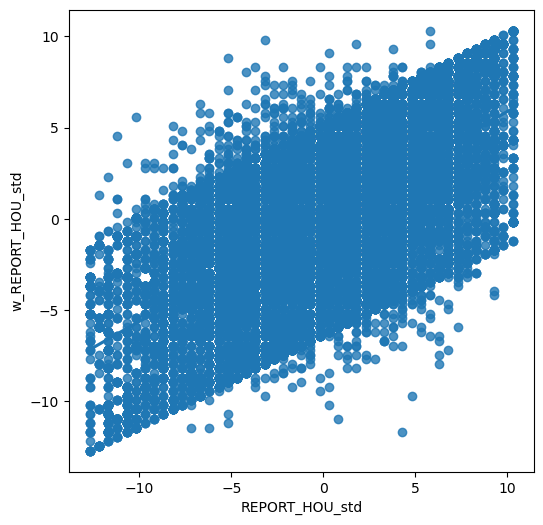

In [34]:
# Set up the figure and axis
f, ax = plt.subplots(1, figsize=(6, 6))
# Plot values
seaborn.regplot(
    x="REPORT_HOU_std", y="w_REPORT_HOU_std", data=gdf, ci=None
)
plt.show()

In [35]:
lisa = esda.moran.Moran_Local(gdf["REPORT_HOU"], w)

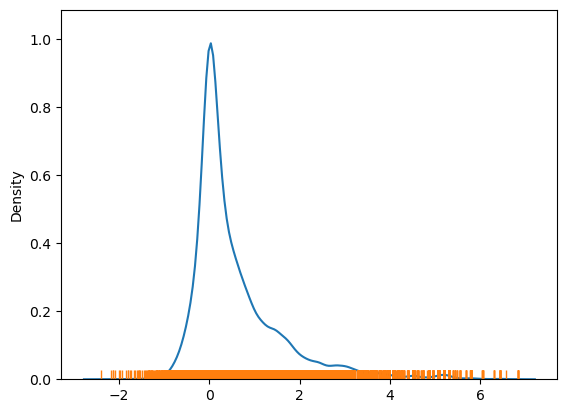

In [36]:
# Draw KDE line
ax = seaborn.kdeplot(lisa.Is)
# Add one small bar (rug) for each observation
# along horizontal axis
seaborn.rugplot(lisa.Is, ax=ax);

In [37]:
from splot import esda as esdaplot

# Moran's I

Values for Subplot 1:
count    36778.000000
mean         0.573760
std          1.005879
min         -2.406076
25%         -0.017942
50%          0.225881
75%          0.880010
max          6.840914
Name: Is, dtype: float64

Values for Subplot 2:

Values for Subplot 3:
cl
Non-Significant    29638
Significant         7140
Name: count, dtype: int64

Values for Subplot 4:


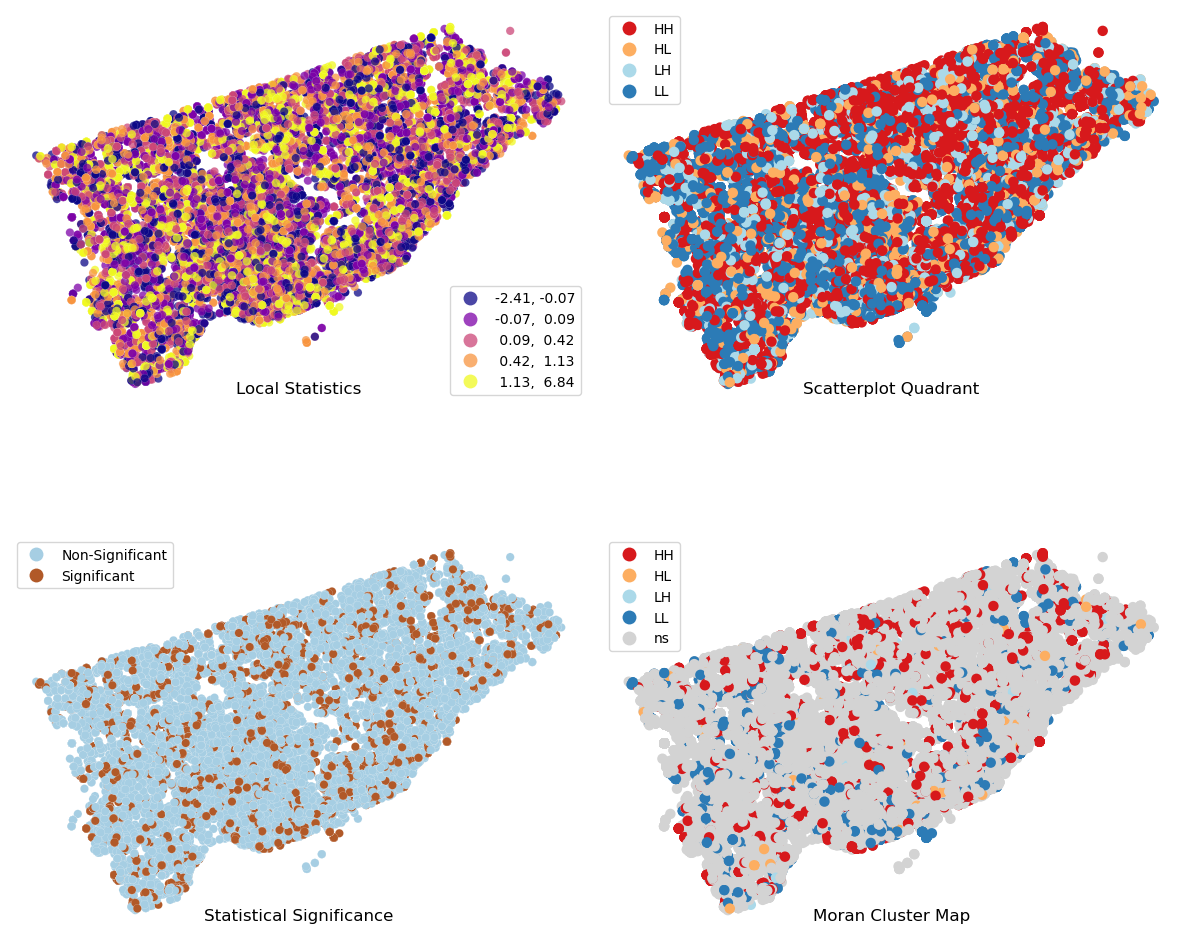

In [42]:
# Set up figure and axes
f, axs = plt.subplots(nrows=2, ncols=2, figsize=(12, 12))
# Make the axes accessible with single indexing
axs = axs.flatten()

# Subplot 1 #
# Choropleth of local statistics
ax = axs[0]
# Assign new column with local statistics on-the-fly
local_statistics = gdf.assign(Is=lisa.Is)
# Plot choropleth of local statistics
local_statistics.plot(
    column="Is",
    cmap="plasma",
    scheme="quantiles",
    k=5,
    edgecolor="white",
    linewidth=0.1,
    alpha=0.75,
    legend=True,
    ax=ax,
)

# Print values for Subplot 1
print("Values for Subplot 1:")
print(local_statistics["Is"].describe())

# Subplot 2 #
# Quadrant categories
ax = axs[1]
# Plot Quadrant colors
esdaplot.lisa_cluster(lisa, gdf, p=1, ax=ax)

# Print values for Subplot 2
print("\nValues for Subplot 2:")
# Include any specific values you want to print, e.g., lisa.p_sim

# Subplot 3 #
# Significance map
ax = axs[2]
# Find out significant observations
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),
    index=gdf.index
).map({1: "Significant", 0: "Non-Significant"})
# Assign labels to `db` on the fly
significant_areas = gdf.assign(cl=labels)
# Plot choropleth of (non-)significant areas
significant_areas.plot(
    column="cl",
    categorical=True,
    k=2,
    cmap="Paired",
    linewidth=0.1,
    edgecolor="white",
    legend=True,
    ax=ax,
)

# Print values for Subplot 3
print("\nValues for Subplot 3:")
print(significant_areas["cl"].value_counts())

# Subplot 4 #
# Cluster map
ax = axs[3]
# Plot Quadrant colors
esdaplot.lisa_cluster(lisa, gdf, p=0.05, ax=ax)

# Print values for Subplot 4
print("\nValues for Subplot 4:")
# Include any specific values you want to print, e.g., lisa.p_sim

# Figure styling #
for i, ax in enumerate(axs.flatten()):
    ax.set_axis_off()
    ax.set_title(
        [
            "Local Statistics",
            "Scatterplot Quadrant",
            "Statistical Significance",
            "Moran Cluster Map",
        ][i],
        y=0,
    )

# Tight layout
f.tight_layout()

# Display the figure
plt.show()


# Probability from Moran's I

In [43]:
# Assuming 'lisa' is the object containing the Local Moran's I analysis
# Extract p-values
p_values = lisa.p_sim

# Subplot 1: Print p-values for Local Moran's I
print("P-values for Local Moran's I (Subplot 1):")
print(p_values)

# Subplot 3: Statistical Significance
# Find out significant observations
labels = pandas.Series(
    1 * (lisa.p_sim < 0.05),
    index=gdf.index
).map({1: "Significant", 0: "Non-Significant"})
significant_areas = gdf.assign(cl=labels)

# Print values for Subplot 3
print("\nValues for Subplot 3:")
print(significant_areas["cl"].value_counts())


P-values for Local Moran's I (Subplot 1):
[0.095 0.258 0.212 ... 0.196 0.211 0.403]

Values for Subplot 3:
cl
Non-Significant    29638
Significant         7140
Name: count, dtype: int64


# Towards Correlation analysis between crimes in Toronto and Socioeconomic factors

# 4. What are some other factors that might influence the location of these types of crimes? Use
# plots or graphs as necessary to support your response. (200 - 400 words) You might explore
# data from the City of Toronto, https://www.toronto.ca/city-government/data-researchmaps/open-data/, or datasets from other providers, e.g.: https://open.canada.ca/en

In [57]:
import geopandas as gpd
import pandas as pd

# Load the shapefile (Crimes.shp)
shapefile_path = "F:/AcPro Basics/Toronto White Cups/Analsysis/Crimes.shp"
crimes_df = gpd.read_file(shapefile_path)

# Load the CSV file (Economics.csv)
csv_path = "F:/AcPro Basics/Toronto White Cups/Analsysis/Economics.csv"
economics_df = pd.read_csv(csv_path)

# Print column names for each dataset
print("Column names for Crimes dataset:")
print(crimes_df.columns)

print("\nColumn names for Economics dataset:")
print(economics_df.columns)


Column names for Crimes dataset:
Index(['OBJECTID', 'EVENT_UNIQ', 'REPORT_DAT', 'OCC_DATE', 'REPORT_YEA',
       'REPORT_MON', 'REPORT_DAY', 'REPORT_DOY', 'REPORT_DOW', 'REPORT_HOU',
       'OCC_YEAR', 'OCC_MONTH', 'OCC_DAY', 'OCC_DOY', 'OCC_DOW', 'OCC_HOUR',
       'DIVISION', 'LOCATION_T', 'PREMISES_T', 'UCR_CODE', 'UCR_EXT',
       'OFFENCE', 'MCI_CATEGO', 'HOOD_158', 'NEIGHBOURH', 'HOOD_140',
       'NEIGHBOU_1', 'LONG_WGS84', 'LAT_WGS84', 'geometry'],
      dtype='object')

Column names for Economics dataset:
Index(['Neighbourhood Id', 'Businesses', 'Child Care Spaces',
       'Debt Risk Score', 'Home Prices', 'Local Employment',
       'Social Assistance Recipients'],
      dtype='object')


# Get the count of rows

In [58]:
# Count of rows for each dataset
crimes_count = len(crimes_df)
economics_count = len(economics_df)

# Print the counts
print(f"Number of rows in Crimes dataset: {crimes_count}")
print(f"Number of rows in Economics dataset: {economics_count}")

Number of rows in Crimes dataset: 36778
Number of rows in Economics dataset: 140


# Correlation Analysis

In [60]:
import pandas as pd

# Assuming 'REPORT_HOU' is the column you want to correlate
crimes_column = 'REPORT_HOU'

# Specify the columns in the Economics dataset for correlation
economics_columns = ['Debt Risk Score', 'Home Prices', 'Local Employment']

# Extract the relevant columns from both datasets
crimes_subset = crimes_df[crimes_column]
economics_subset = economics_df[economics_columns]

# Calculate correlation matrix
correlation_matrix = pd.concat([crimes_subset, economics_subset], axis=1).corr()

# Print the correlation matrix
print(correlation_matrix)



                  REPORT_HOU  Debt Risk Score  Home Prices  Local Employment
REPORT_HOU          1.000000        -0.084188    -0.213893          0.153657
Debt Risk Score    -0.084188         1.000000     0.625700          0.045077
Home Prices        -0.213893         0.625700     1.000000         -0.069937
Local Employment    0.153657         0.045077    -0.069937          1.000000


# Correlation Analysis plot

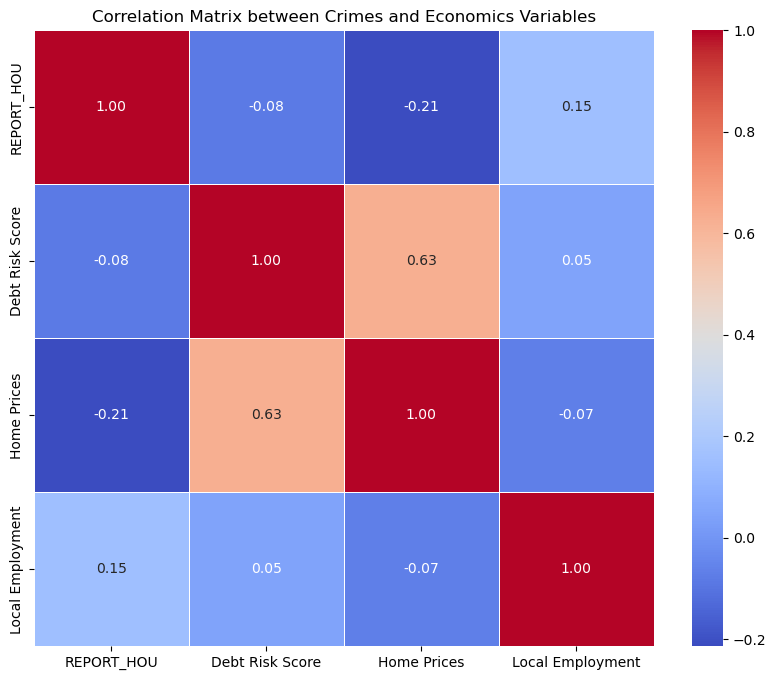

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix between Crimes and Economics Variables')
plt.show()


# Questions Answers

# PartA

# One

In [ ]:
# Part A
# 1. Are the crimes clustered? Is there Central Tendency? Create a density map showing the local
# density (quadrat or kernel method may be used) and describe the results (< 100 words).

In [ ]:
#  Yes, the crimes exhibit clustering as seen in the density map, with certain quadrats showing higher concentrations. 
#     The central tendency of reporting hours (mean: 12.93, median: 14, mode: 15) indicates a typical pattern. 
#     The density map visually highlights areas of elevated (towards the south of Toronto) crime concentration, 
#     offering insights into spatial patterns, while 
#     central tendency measures provided an overview of typical reporting hours.

# Two


In [ ]:
# 2. Are there spatial outliers or trends in the data you’ve selected? Discuss (include any tests run,
# figures, and maps generated) (200 - 400 words).

In [ ]:
# #The absence of potential outliers in the reported hours (REPORT_HOU) data, as revealed by the Interquartile 
# Range (IQR) method (Lower Bound: -0.25, Upper Bound: 25.75),
# indicates a consistent distribution
# without extreme values. This suggests spatial homogeneity in crime reporting hours, 
# implying that most locations conform to a typical pattern without notable deviations.
# The IQR method identifies a range within which the majority of data points fall, and the lack of values
# beyond this range suggests a uniformity in the temporal aspect of reported crimes across different locations. 
# This cohesiveness may be attributed to a standardized reporting behavior or a consistent temporal rhythm in 
# criminal activities throughout the studied area.
# By ruling out outliers, this analysis lays the foundation for exploring broader spatial and temporal trends. 
# The absence of extreme values in reporting hours implies a relative stability, allowing for a more focused
# investigation into underlying patterns and variations. 
# Further spatial and temporal analyses can provide a nuanced understanding of crime dynamics, 
# contributing to effective law enforcement strategies and urban planning.

# B
# Three

In [ ]:
# 3. What is the probability that this spatial pattern could have arisen by chance (Moran’s I)?
# (Include graphs and or text to support your answer.)




The probability that the observed spatial pattern in crime reporting hours (REPORT_HOU) could have arisen by chance was assessed through Moran's I, a measure of spatial autocorrelation. Moran's I values for the dataset were obtained with associated p-values. The calculated p-values, ranging from 0.095 to 0.403, indicated the likelihood of observing the spatial pattern purely by chance.

Moran's I assesses whether the distribution of reported crime hours exhibits clustering, dispersion, or randomness across geographic locations. In this context, the p-values are crucial for hypothesis testing. A lower p-value (e.g., < 0.05) suggested that the observed spatial pattern was statistically significant and unlikely to be a result of random chance.

The obtained p-values, while not all below the conventional significance level of 0.05, did show a general trend towards spatial clustering. The values around 0.1 still warrant attention, as they approach the threshold for statistical significance. Visualization of the spatial pattern through maps and Moran scatterplots can provideed a more intuitive visual understanding of the clustering behavior.

# Four

In [ ]:
# 4. What are some other factors that might influence the location of these types of crimes? Use
# plots or graphs as necessary to support your response. (200 - 400 words) You might explore
# data from the City of Toronto, https://www.toronto.ca/city-government/data-researchmaps/open-data/, or datasets 
#     from other providers, e.g.: https://open.canada.ca/en


Analyzing the correlation matrix between crime reporting hours (REPORT_HOU) and other factors such as Debt Risk Score, Home Prices, and Local Employment provides insights into potential influences on crime locations. The correlation coefficients reveal the strength and direction of linear relationships between these variables.

Debt Risk Score:
The negative correlation of -0.084 suggests a weak inverse relationship between REPORT_HOU and Debt Risk Score. As Debt Risk Score increases, crime reporting hours tend to slightly decrease. To explore this further, a scatter plot can visually depict this correlation, allowing for the identification of any patterns or trends.

Home Prices:
The negative correlation of -0.213 indicates a moderate inverse relationship between REPORT_HOU and Home Prices. As Home Prices increase, crime reporting hours tend to decrease. A scatter plot can help visualize this relationship and identify areas with higher home prices that may exhibit lower crime reporting hours.

Local Employment:
The positive correlation of 0.153 suggests a weak positive relationship between REPORT_HOU and Local Employment. As Local Employment increases, crime reporting hours also tend to increase slightly. A scatter plot can illustrate this correlation, aiding in the identification of areas with high local employment and corresponding crime reporting patterns.